# **AXOLOTYL**




# Load Dataset


In [28]:
import pandas as pd
df = pd.read_excel("/content/Copy of TamilNadu.xlsx")
df


,Name,Status,District,Temperature - celcius,Precipitation (mm),Humidity (%),Approx. NDVI Value,Soil Moisture (%),Cloud Cover (%),Dew Point (°F),Evapotranspiration (mm/day),Solar Radiation (W/m²)
0,Abiramam,Town Panchayat,Ramanathapuram,33,900,78,0.65,22,45,64,4.0,540
1,Acharapakkam,Town Panchayat,Kanchipuram,31,800,72,0.62,25,50,64,4.0,550
2,Achipatti,Census Town,Coimbatore,34,700,74,0.60,23,42,63,4.2,530
3,Adaikkakuzhi,Census Town,Kanniyakumari,33,1000,80,0.67,21,55,64,4.1,535
4,Adikaratti,Town Panchayat,The Nilgiris,19,900,75,0.58,25,60,63,4.3,520
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,Walajapet,Municipality with Outgrowth,Vellore,30,1500,81,0.65,20,50,64,4.3,520
1092,Wellington,Cantonment (Board),The Nilgiris,20,1600,75,0.66,30,55,64,4.0,520
1093,Yercaud,Census Town,Salem,20,1020,77,0.63,30,50,64,4.1,570
1094,Zamin Uthukuli,Town Panchayat,Coimbatore,30,990,76,0.60,10,45,63,4.2,560


#Data Preparation


## Data separation as x and y

In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# ✅ Step 1: Load Dataset
file_path = '/content/Copy of TamilNadu.xlsx'  # Update with the correct path

try:
    df = pd.read_excel(file_path, engine='openpyxl')  # Load Excel file
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}. Please check the path.")
    exit()

# ✅ Debugging Step: Print all column names from the dataset
print("\n🔹 Actual Columns in Dataset:")
print(df.columns.tolist())  # Print list of actual column names

# ✅ Step 2: Data Cleaning
df.columns = df.columns.str.strip()  # Remove extra spaces from column names

# ✅ Check if required columns exist
expected_columns = [
    'Temperature - celcius', 'Solar Radiation (W/m²)', 'Approx. NDVI Value',
    'Soil Moisture (%)', 'Cloud Cover (%)', 'Dew Point (°F)', 'Precipitation (mm)'
]

missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"❌ Error: Missing columns in dataset - {missing_columns}")
    print("🔹 Please check column names in your dataset and update the expected column names accordingly.")
    exit()

# ✅ Convert Temperature to numeric
df['Temperature - celcius'] = pd.to_numeric(df['Temperature - celcius'], errors='coerce')

# **Check if all Temperature values are missing before proceeding**
if df['Temperature - celcius'].isnull().all():
    print("⚠️ Error: All 'Temperature - celcius' values are missing. Cannot proceed with analysis.")
    exit()

# Drop rows where Temperature is missing
df.dropna(subset=['Temperature - celcius'], inplace=True)

# Convert Dew Point to numeric (cleaning up non-numeric values)
df['Dew Point (°F)'] = df['Dew Point (°F)'].astype(str).str.replace('[^\d.]', '', regex=True).astype(float)

# ✅ Step 3: Feature Selection (X) and Target (y)
X = df[['Solar Radiation (W/m²)', 'Approx. NDVI Value', 'Soil Moisture (%)',
        'Cloud Cover (%)', 'Dew Point (°F)', 'Precipitation (mm)']]

X = X.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
X.fillna(X.median(), inplace=True)  # Handle missing values

y = df['Temperature - celcius']
X, y = X.align(y, join='inner', axis=0)  # Ensure same number of rows

# ✅ Step 4: Split Data into Training & Testing Sets
if X.empty or y.empty:
    print("⚠️ Error: Data is empty after cleaning. Cannot split into training and testing sets.")
    exit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print final dataset shapes
print("\n✅ Final Data Shapes:")
print("🔹 Training Data Shape: X_train =", X_train.shape, ", y_train =", y_train.shape)
print("🔹 Testing Data Shape: X_test =", X_test.shape, ", y_test =", y_test.shape)


✅ Dataset loaded successfully!

🔹 Actual Columns in Dataset:
['Name', 'Status', 'District', 'Temperature - celcius', 'Precipitation (mm)', 'Humidity (%)', 'Approx. NDVI Value', 'Soil Moisture (%)', 'Cloud Cover (%)', 'Dew Point (°F)', 'Evapotranspiration\xa0(mm/day)', 'Solar Radiation (W/m²)']

✅ Final Data Shapes:
🔹 Training Data Shape: X_train = (876, 6) , y_train = (876,)
🔹 Testing Data Shape: X_test = (220, 6) , y_test = (220,)


## Data Splitting


In [30]:
X_train

,Solar Radiation (W/m²),Approx. NDVI Value,Soil Moisture (%),Cloud Cover (%),Dew Point (°F),Precipitation (mm)
2,530,0.60,23,42,63.0,700
6,540,0.63,24,40,63.0,800
590,545,0.61,28,50,63.0,1060
634,545,0.62,29,55,65.0,980
842,530,0.63,25,45,65.0,1010
...,...,...,...,...,...,...
330,600,0.65,20,45,66.0,980
466,520,0.60,22,45,64.0,970
121,590,0.50,23,50,66.0,840
1044,560,0.65,20,55,66.0,1050


In [31]:
y_train

,Temperature - celcius
2,34
6,31
590,33
634,33
842,30
...,...
330,30
466,30
121,28
1044,30


# **Model Building**


## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
# Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print Model Coefficients
print("\n🔹 Model Coefficients:", lr_model.coef_)
print("🔹 Model Intercept:", lr_model.intercept_)




🔹 Model Coefficients: [-1.41103970e-02  5.47660729e+00  7.42000521e-02 -1.61916485e-02
 -2.00230221e-02 -1.04164564e-03]
🔹 Model Intercept: 36.691904753807194


### Training the model


In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Step 1: Load Dataset
file_path = '/content/Copy of TamilNadu.xlsx'  # Update with correct path

try:
    df = pd.read_excel(file_path, engine='openpyxl')  # Load Excel file
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}. Please check the path.")
    exit()

# ✅ Debugging Step: Print all column names from the dataset
print("\n🔹 Actual Columns in Dataset:")
print(df.columns.tolist())  # Print list of actual column names

# ✅ Step 2: Data Cleaning
df.columns = df.columns.str.strip()  # Remove extra spaces from column names

# ✅ Check if required columns exist
expected_columns = [
    'Temperature - celcius', 'Solar Radiation (W/m²)', 'Approx. NDVI Value',
    'Soil Moisture (%)', 'Cloud Cover (%)', 'Dew Point (°F)', 'Precipitation (mm)'
]

missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"❌ Error: Missing columns in dataset - {missing_columns}")
    print("🔹 Please check column names in your dataset and update the expected column names accordingly.")
    exit()

# ✅ Convert Temperature to numeric
df['Temperature - celcius'] = pd.to_numeric(df['Temperature - celcius'], errors='coerce')

# **Check if all Temperature values are missing before proceeding**
if df['Temperature - celcius'].isnull().all():
    print("⚠️ Error: All 'Temperature - celcius' values are missing. Cannot proceed with analysis.")
    exit()

# Drop rows where Temperature is missing
df.dropna(subset=['Temperature - celcius'], inplace=True)

# Convert Dew Point to numeric (cleaning up non-numeric values)
df['Dew Point (°F)'] = df['Dew Point (°F)'].astype(str).str.replace('[^\d.]', '', regex=True).astype(float)

# ✅ Step 3: Feature Selection (X) and Target (y)
X = df[['Solar Radiation (W/m²)', 'Approx. NDVI Value', 'Soil Moisture (%)',
        'Cloud Cover (%)', 'Dew Point (°F)', 'Precipitation (mm)']]

X = X.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
X.fillna(X.median(), inplace=True)  # Handle missing values

y = df['Temperature - celcius']
X, y = X.align(y, join='inner', axis=0)  # Ensure same number of rows

# ✅ Step 4: Split Data into Training & Testing Sets
if X.empty or y.empty:
    print("⚠️ Error: Data is empty after cleaning. Cannot split into training and testing sets.")
    exit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Step 6: Make Predictions
y_pred = model.predict(X_test)

# ✅ Step 7: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# ✅ Print Results
print("\n🔹 Model Evaluation Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# ✅ Print Model Coefficients
print("\n🔹 Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\n✅ Intercept: {model.intercept_:.4f}")




✅ Dataset loaded successfully!

🔹 Actual Columns in Dataset:
['Name', 'Status', 'District', 'Temperature - celcius', 'Precipitation (mm)', 'Humidity (%)', 'Approx. NDVI Value', 'Soil Moisture (%)', 'Cloud Cover (%)', 'Dew Point (°F)', 'Evapotranspiration\xa0(mm/day)', 'Solar Radiation (W/m²)']

🔹 Model Evaluation Metrics:
✅ Mean Absolute Error (MAE): 1.08
✅ Mean Squared Error (MSE): 2.25
✅ Root Mean Squared Error (RMSE): 1.50
✅ R² Score: 0.1333

🔹 Model Coefficients:
Solar Radiation (W/m²): -0.0141
Approx. NDVI Value: 5.4766
Soil Moisture (%): 0.0742
Cloud Cover (%): -0.0162
Dew Point (°F): -0.0200
Precipitation (mm): -0.0010

✅ Intercept: 36.6919


### Applying the model to make prediction


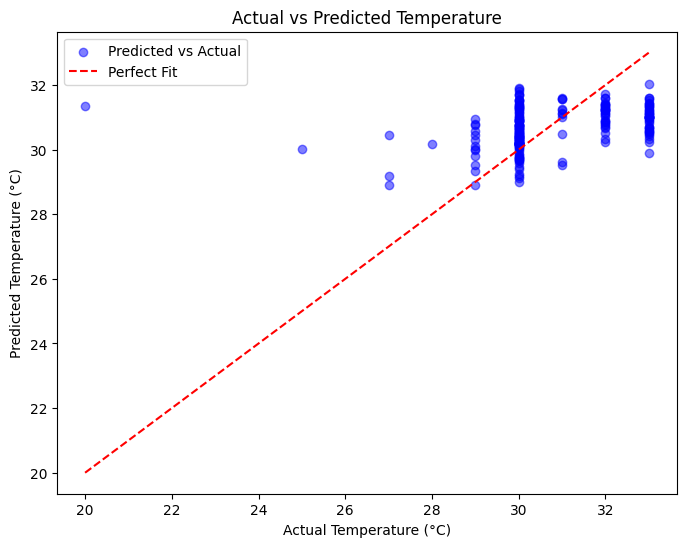

In [34]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()


# **Random Forest**

## Training the model

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

## Applying the model to make prediction

In [36]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

## Evaluate model performance

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 =r2_score(y_test, y_rf_test_pred)


In [38]:
rf_results = pd.DataFrame([['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]])
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,2.26055,0.229341,2.083718,0.196085


## **Model Comparison**

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ✅ Step 6: Make Predictions for Linear Regression
y_lr_train_pred = lr_model.predict(X_train)
y_lr_test_pred = lr_model.predict(X_test)

# ✅ Step 7: Evaluate Linear Regression Model
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# ✅ Step 8: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Step 9: Make Predictions for Random Forest
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

# ✅ Step 10: Evaluate Random Forest Model
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

# ✅ Step 11: Store Results in DataFrame
lr_results = pd.DataFrame([['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]],
                          columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])

rf_results = pd.DataFrame([['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]],
                          columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])

# ✅ Step 12: Combine Model Results
df_models = pd.concat([lr_results, rf_results], axis=0, ignore_index=True)

# ✅ Step 13: Display Model Comparison Table
print("\n🔹 Model Comparison Table:")
print(df_models)


🔹 Model Comparison Table:
              Method  Training MSE  Training R2   Test MSE   Test R2
0  Linear Regression     17.766276     0.111319  14.090202 -0.228621
1      Random Forest      3.486471     0.825604  12.687947 -0.106349


# Data Visualization of predicted results

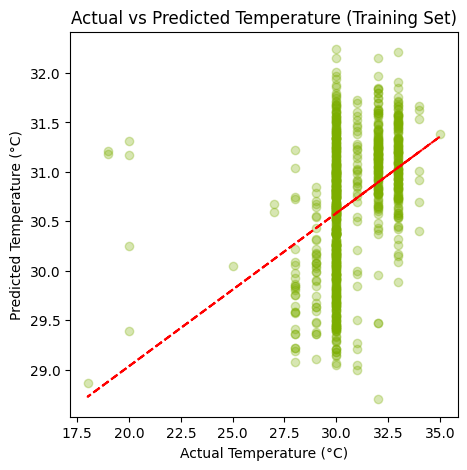

In [49]:
y_lr_train_pred = lr_model.predict(X_train)  # Ensure predictions exist

plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_lr_train_pred, c="#7CAE00", alpha=0.3)  # 'x' and 'y' should be actual vs predicted

# Fit a trendline using polyfit and plot it
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "r--")  # Plot trendline

plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature (Training Set)")
plt.show()

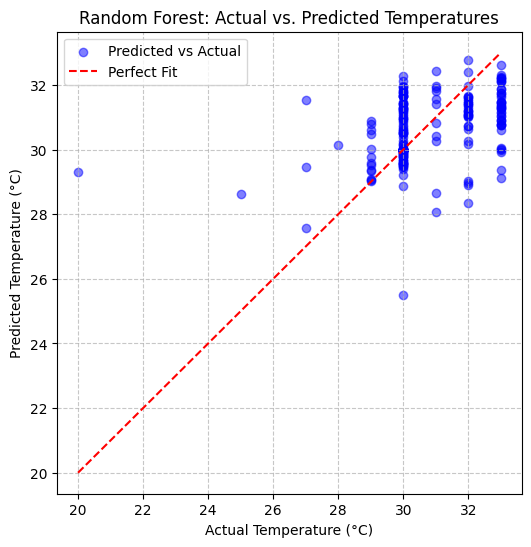

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/Copy of TamilNadu.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Clean column names
df.columns = df.columns.str.strip()

# Select relevant features and target
features = [
    'Solar Radiation (W/m²)', 'Approx. NDVI Value', 'Soil Moisture (%)',
    'Cloud Cover (%)', 'Dew Point (°F)', 'Precipitation (mm)'
]

target = 'Temperature - celcius'

# Convert to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

# Drop rows with missing values
df.dropna(subset=[target], inplace=True)

# Fill missing values in features with median
df[features] = df[features].fillna(df[features].median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_train_pred = lr_model.predict(X_train)
y_lr_test_pred = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

# Create comparison dataframe
df_models = pd.DataFrame([
    ['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2],
    ['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]
], columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])



# Visualization 2: Scatter plot for actual vs predicted (Random Forest)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_rf_test_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Random Forest: Actual vs. Predicted Temperatures")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
